# Data Processing 
1. Load data 
2. Define target variable y and data X
3. Encoding categorical features into numeric
4. Standardize the continous features, Age in this case
5. Logistic regression. Run a gridsearch for best parameter
6. PCA
7. Knn neighbor and run gridsearch
8. Decision Tree and run gridsearch
9. RandomForest model and Randomsearch
10. Run RandomForestClassifier again with age as a categorical variable
11. pipeline



### 1. Load data


In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= [8,6]
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score,log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

In [563]:
df = pd.read_csv('../fixed data/diabetes_data.csv', index_col = 0)

In [564]:
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     Class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [653]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

In [566]:
#change the category of all categorical variables to catgory
for col in df.columns[1:]:
    df[col] = df[col].astype('category')

In [567]:
df.dtypes

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
Class                 category
dtype: object

## 2. Define target variable y and data X

### a. define target variable y

In [568]:
y = df['Class'].replace({'Positive':1,'Negative': 0})
y.shape


(520,)

Visualize target variable 

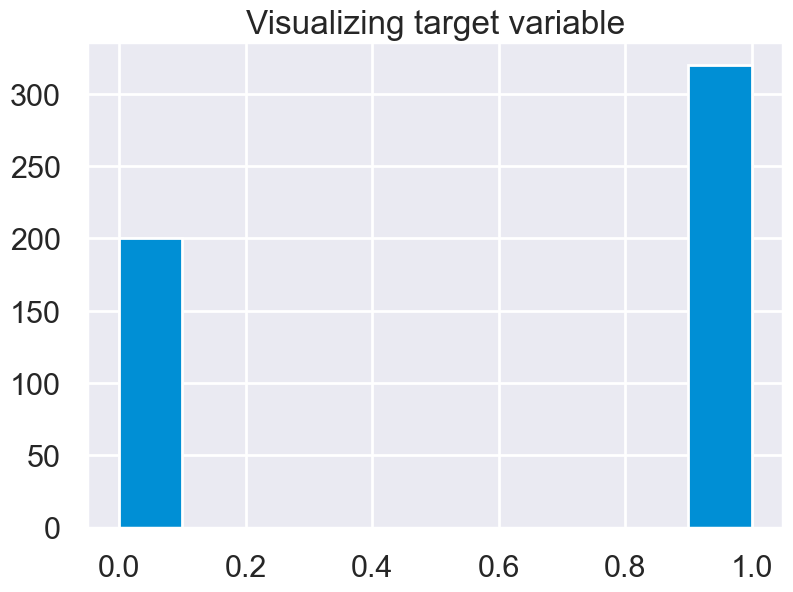

In [569]:
#plot target variable
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.set_context('poster')
#plt.figure(figsize=(10,))
plt.hist(y,density= False)
plt.title('Visualizing target variable');

### b. Define X

In [570]:
X = df.drop('Class',axis=1)
X.head()
X.shape,X.columns

((520, 16),
 Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
        'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
        'Itching', 'Irritability', 'delayed healing', 'partial paresis',
        'muscle stiffness', 'Alopecia', 'Obesity'],
       dtype='object'))

### 3. hot encode all the non numeric variables, and y 

In [571]:
# age is continuous so it is not included in get_dummies
numeric_X = pd.get_dummies(X.iloc[:,1:], drop_first=True)
numeric_X.head()

Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
0            1             0               1                       0   
1            1             0               0                       0   
2            1             1               0                       0   
3            1             0               0                       1   
4            1             1               1                       1   

   weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0             1               0                   0                    0   
1             1               0                   0                    1   
2             1               1                   0                    0   
3             1               1                   1                    0   
4             1               1                   0                    1   

   Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
0            1                 0                    1                    0   
1            0                 0                    0                    1   
2            1                 0                    1                    0   
3            1                 0                    1                    0   
4            1                 1                    1                    1   

   muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
0                     1             1            1  
1                     0             1            0  
2                     1             1            0  
3                     0             0            0  
4                     1             1            1

In [572]:
X.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity  
0              No              Yes      Yes     Yes  
1             Yes               No      Yes      No  
2              No              Yes      Yes      No  
3              No               No       No      No  
4             Yes              Yes      Yes     Yes

In [573]:
#join the Age variable to dataframe
#numeric_X = numeric_X.join(X.Age)
numeric_X = pd.concat([X.Age,numeric_X],axis=1)
numeric_X.shape,numeric_X.columns


((520, 16),
 Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
        'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
        'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
        'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
        'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes'],
       dtype='object'))

In [574]:
numeric_X.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
0   40            1             0               1                       0   
1   58            1             0               0                       0   
2   41            1             1               0                       0   
3   45            1             0               0                       1   
4   60            1             1               1                       1   

   weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0             1               0                   0                    0   
1             1               0                   0                    1   
2             1               1                   0                    0   
3             1               1                   1                    0   
4             1               1                   0                    1   

   Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
0            1                 0                    1                    0   
1            0                 0                    0                    1   
2            1                 0                    1                    0   
3            1                 0                    1                    0   
4            1                 1                    1                    1   

   muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
0                     1             1            1  
1                     0             1            0  
2                     1             1            0  
3                     0             0            0  
4                     1             1            1

### d. split dataset into trainig and test sets

In [575]:
X_train,X_test,y_train,y_test = train_test_split(numeric_X,y,test_size=0.2,random_state=123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((416, 16), (104, 16), (416,), (104,))

In [576]:
X_train.columns


Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes'],
      dtype='object')

### 4. Age is a continuous variable and we need to scale it for logistic regression

In [577]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [578]:
#copy X_train and X_test to see which of standardscaler or minmaxscaler works better
#X_train_ss and X_test_ss will be used for standardscaler and X_train, X_test will be used for minmax
X_train_ss = X_train.copy()
X_test_ss = X_test.copy()
X_train.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
42    50            0             0               1                       0   
376   43            1             0               0                       0   
184   48            0             1               1                       1   
41    50            0             1               1                       1   
494   36            1             0               0                       0   

     weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
42              1               1                   0                    1   
376             1               0                   1                    0   
184             0               1                   1                    0   
41              0               1                   0                    0   
494             0               0                   0                    0   

     Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
42             1                 1                    1                    1   
376            1                 0                    1                    0   
184            0                 1                    1                    0   
41             0                 0                    1                    1   
494            0                 0                    0                    0   

     muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
42                      1             0            0  
376                     0             1            0  
184                     1             1            1  
41                      0             0            0  
494                     0             0            0

In [579]:
#try both scaling and standardizing
ss = StandardScaler()
ss.fit(X_train_ss[['Age']])
X_train_ss[['Age']] = ss.transform(X_train_ss[['Age']])
X_test_ss[['Age']] = ss.transform(X_test_ss[['Age']])

In [580]:
X_test_ss.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
264 -0.819134            0             1               1   
327 -0.052233            1             0               0   
289 -0.648712            1             0               0   
172  1.055514            1             1               0   
326  0.459035            1             0               0   

     sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
264                       1             1               1                   0   
327                       0             0               0                   0   
289                       1             0               0                   0   
172                       0             0               0                   0   
326                       0             1               0                   0   

     visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
264                    1            1                 1                    1   
327                    0            0                 1                    0   
289                    0            0                 0                    0   
172                    1            0                 0                    0   
326                    1            1                 0                    1   

     partial paresis_Yes  muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
264                    1                     1             0            0  
327                    1                     0             0            1  
289                    0                     0             0            1  
172                    1                     0             1            0  
326                    0                     1             1            0

In [581]:
#normalize data and transform training data
pd.options.mode.chained_assignment = None # not display the error message
norm = MinMaxScaler()
X_train[['Age']] = norm.fit_transform(X_train[['Age']])


In [582]:
X_train.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
42   0.459459            0             0               1   
376  0.364865            1             0               0   
184  0.432432            0             1               1   
41   0.459459            0             1               1   
494  0.270270            1             0               0   

     sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
42                        0             1               1                   0   
376                       0             1               0                   1   
184                       1             0               1                   1   
41                        1             0               1                   0   
494                       0             0               0                   0   

     visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
42                     1            1                 1                    1   
376                    0            1                 0                    1   
184                    0            0                 1                    1   
41                     0            0                 0                    1   
494                    0            0                 0                    0   

     partial paresis_Yes  muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
42                     1                     1             0            0  
376                    0                     0             1            0  
184                    0                     1             1            1  
41                     1                     0             0            0  
494                    0                     0             0            0

In [583]:
#normalize test data
X_test[['Age']] = norm.transform(X_test[['Age']])
X_test.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
264  0.297297            0             1               1   
327  0.418919            1             0               0   
289  0.324324            1             0               0   
172  0.594595            1             1               0   
326  0.500000            1             0               0   

     sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
264                       1             1               1                   0   
327                       0             0               0                   0   
289                       1             0               0                   0   
172                       0             0               0                   0   
326                       0             1               0                   0   

     visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
264                    1            1                 1                    1   
327                    0            0                 1                    0   
289                    0            0                 0                    0   
172                    1            0                 0                    0   
326                    1            1                 0                    1   

     partial paresis_Yes  muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
264                    1                     1             0            0  
327                    1                     0             0            1  
289                    0                     0             0            1  
172                    1                     0             1            0  
326                    0                     1             1            0

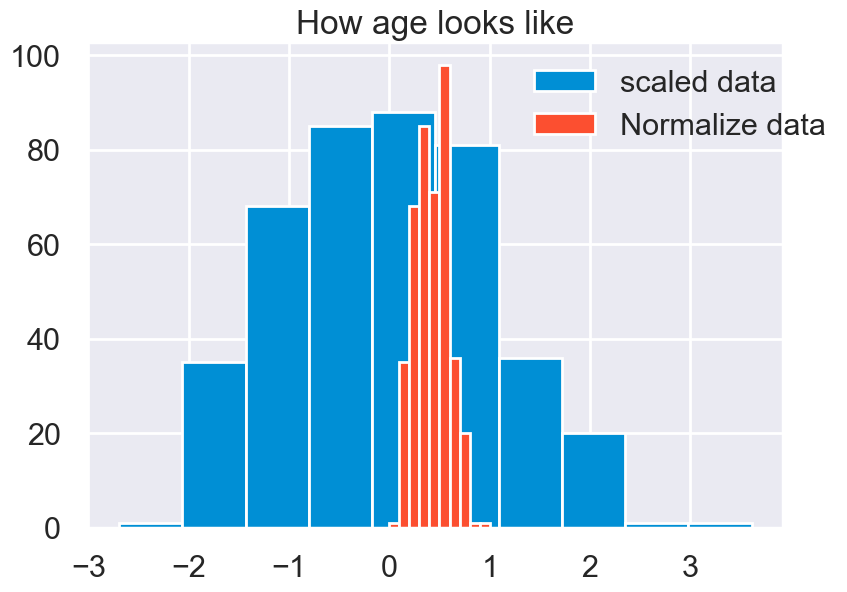

In [584]:

X_train_ss['Age'].hist(label='scaled data')
X_train['Age'].hist(label = 'Normalize data')
plt.legend()
plt.title('How age looks like')
plt.legend(loc='upper right',bbox_to_anchor=(1.10, 1));

In [585]:
X_train.head()

Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
42   0.459459            0             0               1   
376  0.364865            1             0               0   
184  0.432432            0             1               1   
41   0.459459            0             1               1   
494  0.270270            1             0               0   

     sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
42                        0             1               1                   0   
376                       0             1               0                   1   
184                       1             0               1                   1   
41                        1             0               1                   0   
494                       0             0               0                   0   

     visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
42                     1            1                 1                    1   
376                    0            1                 0                    1   
184                    0            0                 1                    1   
41                     0            0                 0                    1   
494                    0            0                 0                    0   

     partial paresis_Yes  muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
42                     1                     1             0            0  
376                    0                     0             1            0  
184                    0                     1             1            1  
41                     1                     0             0            0  
494                    0                     0             0            0

### 5. Implement logistic regression model on train data

In [586]:
from sklearn.linear_model import LogisticRegression
 

In [587]:
#fit logistic regression with default settings of C=1, and l2 regularizaion  to scaled data and predict
lr_1 = LogisticRegression()
model_ss = lr_1.fit(X_train_ss,y_train)
y_pred_ss = model_ss.predict(X_test_ss)

In [588]:
model_ss.coef_.shape


(1, 16)

Since we are detecting disease, there is a higher cost to false negatives, someone is sick and model shows they are not sick, to false positives, someone is not sick and it shows that they are sick. If a person is sick, then they need treatment right away. However, we also care about false positives because we don't want to treat someone who doesn't need treatment.

In [589]:
#fit logistic regression with default settings of C=1, and l2 regularizaion  to normalized data and predict
lr_2 = LogisticRegression()
model_m = lr_2.fit(X_train,y_train)
y_pred_m = model_m.predict(X_test)


In [590]:
#measure score of each model
print('score for scaled data:',model_ss.score(X_test_ss,y_test),'score for normalized data:',model_m.score(X_test,y_test))

score for scaled data: 0.9326923076923077 score for normalized data: 0.9423076923076923


In [591]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy tp+tn/all: ', accuracy_score(y_test,y_pred_ss),accuracy_score(y_test,y_pred_m))


accuracy tp+tn/all:  0.9326923076923077 0.9423076923076923


since the data has more positive cases than negative (60% positive) so accuracy might not be the best metric to use 

In [53]:
#pd.crosstab(y_test, y_pred_m, rownames = ['Actual'],colnames=['predicted'])

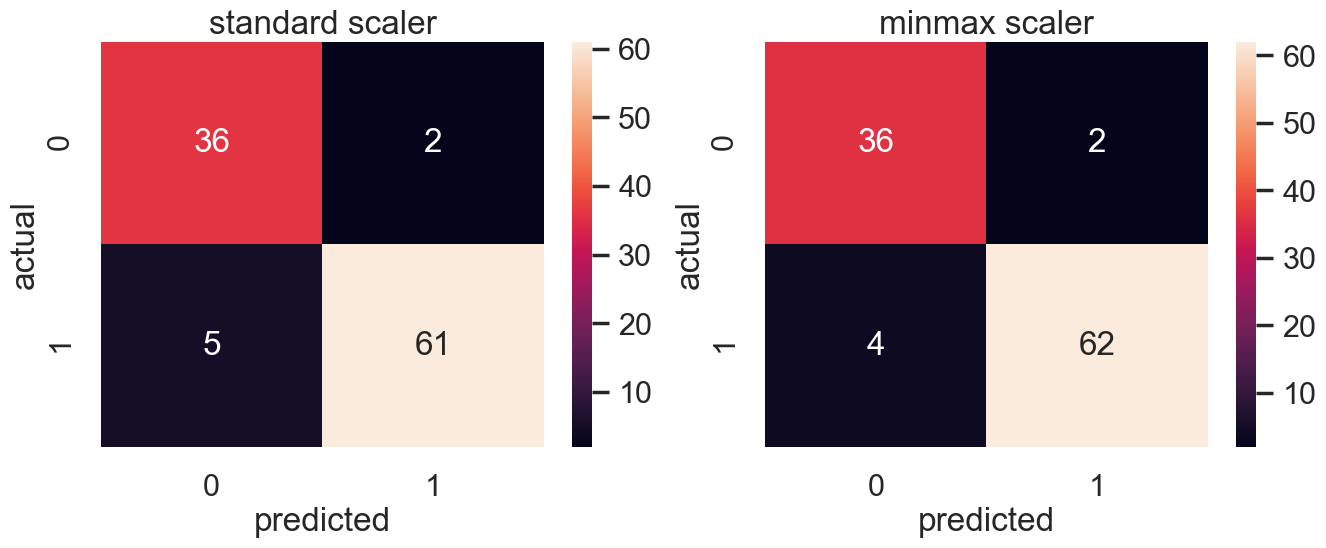

In [592]:
plt.figure(figsize=(14,5))
c_matrix_ss = confusion_matrix(y_test,y_pred_ss)
c_matrix_m = confusion_matrix(y_test,y_pred_m)
plt.subplot(1,2,1)
sns.heatmap(c_matrix_ss,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('standard scaler')

plt.subplot(1,2,2)
sns.heatmap(c_matrix_m,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('minmax scaler');

In [593]:
print(y_test[y_test != y_pred_ss],'\n',y_test[y_test != y_pred_m])


437    1
267    1
200    0
72     1
55     1
26     1
347    0
Name: Class, dtype: int64 
 437    1
267    1
200    0
55     1
26     1
347    0
Name: Class, dtype: int64


The 7 mistakes that the model made are for the same patients for standardized and normalized data

In [594]:
#classification report for standardized data
print(classification_report(y_test,y_pred_ss))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.97      0.92      0.95        66

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [595]:
#classification report normalized data
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



Both methods of standardization methods give similar results, however MinMaxScaler has a slightly better recall for the positive class and better precision for negative class. Also minmaxScaler gave slightly better f1 score

Normalizing the data gives better results in all the metrics so normalized data will be used in model



### Roc curve of false positives vs. true positives

Text(0.5, 1.0, 'ROC curve for scaled data')

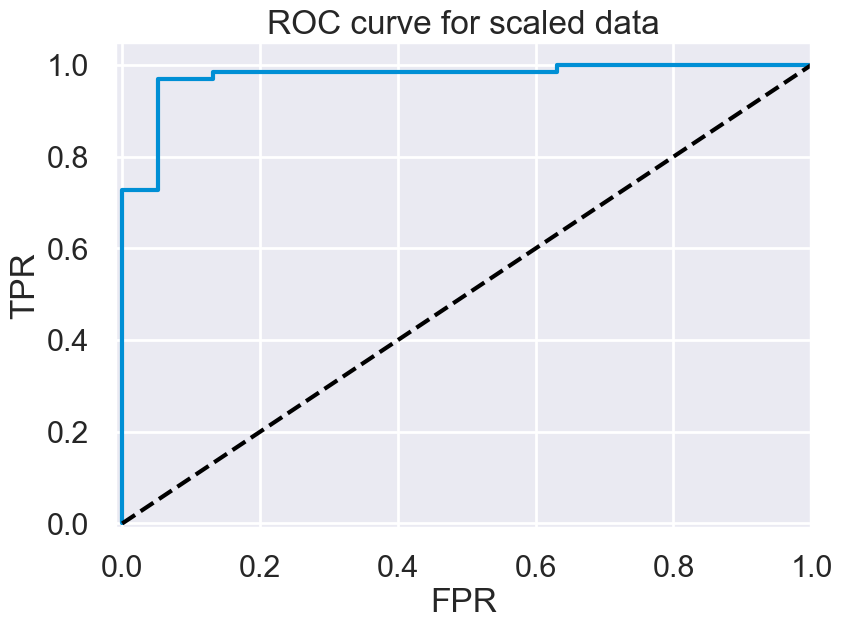

In [596]:

y_pred_proba_ss = model_ss.predict_proba(X_test_ss)[:,1]
fp,tp,threshold = roc_curve(y_test,y_pred_proba_ss)

plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for scaled data')

Text(0.5, 1.0, 'ROC curve for normalized data')

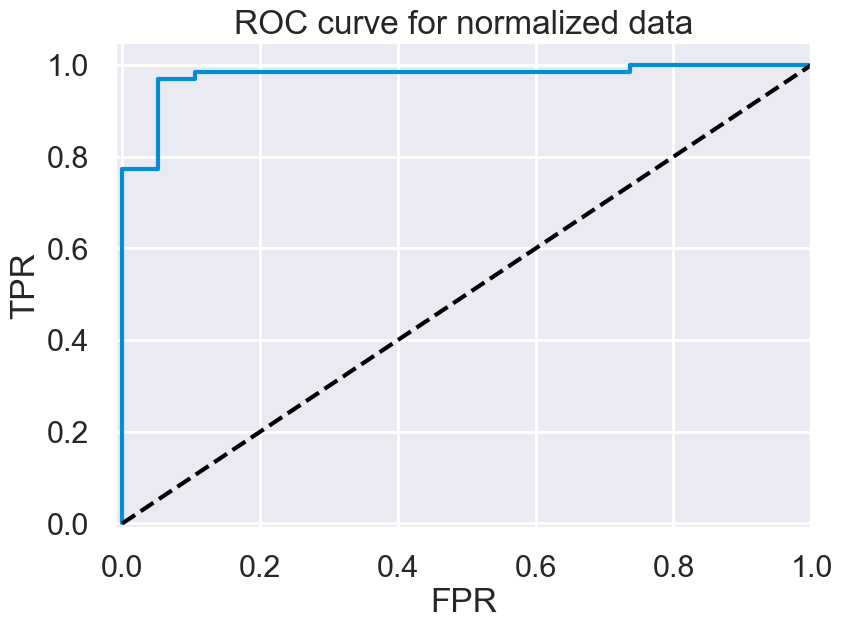

In [597]:
y_pred_proba_m = model_m.predict_proba(X_test)[:,1]

fp,tp,threshold = roc_curve(y_test,y_pred_proba_m)
roc_auc_score(y_test,y_pred_proba_m)
plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for normalized data');

AUC is a measure of the area under the curve. It shows how well the model distinguishes between positives and 
negatives. The higher the auc the better the model is at predicting 0s and 1s.

In [598]:
roc_auc_score(y_test,y_pred_ss),roc_auc_score(y_test,y_pred_m)

(0.935805422647528, 0.9433811802232857)

From the auc scores and the graphs and the other metrics minmaxScaler gave slightly better results so it will be used in all the models

## 6. PCA

(0.0, 16.0)

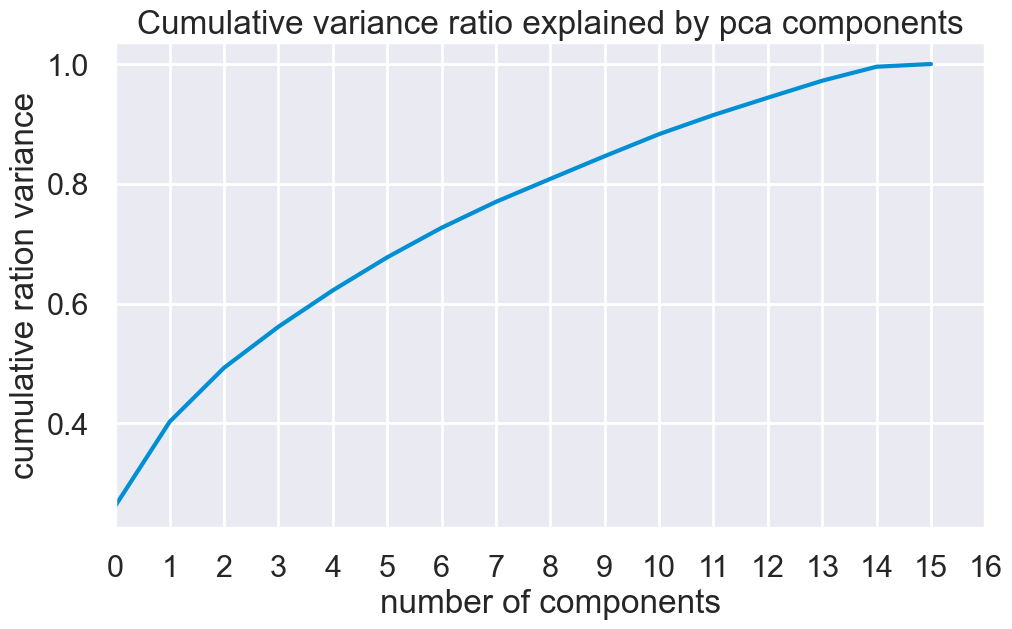

In [599]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit(X_train)
plt.figure(figsize=(10,6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
tix = np.arange(0,17)
plt.xlabel('number of components')
plt.ylabel('cumulative ration variance')
plt.xticks(tix)
plt.title('Cumulative variance ratio explained by pca components')
plt.xlim(0,16)
#plt.ylim(0,1.02);

There is no clear elbow here so there is no point in reducing the number of variables and I will use all the variables in the data.

In [600]:
pca.explained_variance_

array([0.90527512, 0.48471535, 0.31086668, 0.23652057, 0.20958738,
       0.19028299, 0.17036747, 0.14959092, 0.1322287 , 0.13093244,
       0.12677515, 0.11010542, 0.09995864, 0.09774394, 0.08069368,
       0.01564961])

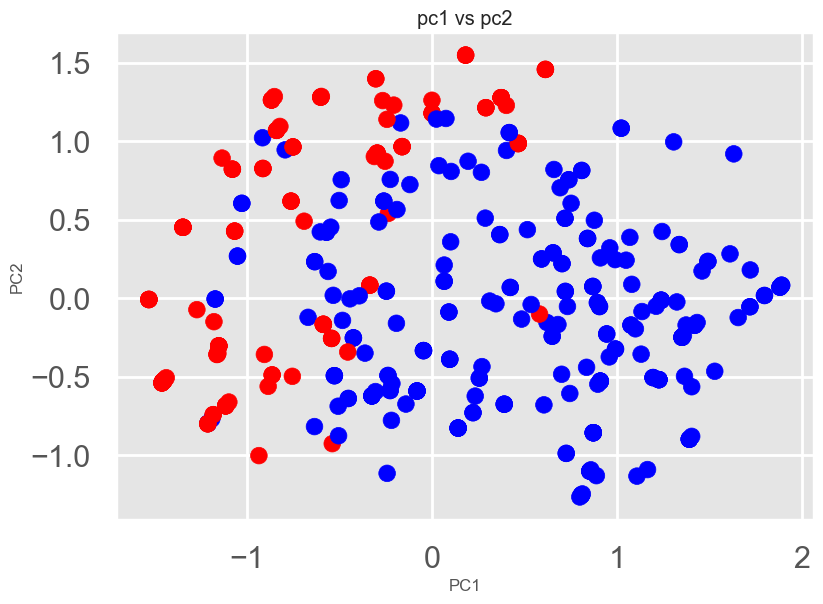

In [601]:
plt.style.use('ggplot')
pca_2 = PCA(n_components=2)
color_dict = {0:'red',1:'blue'}
color_label = [color_dict[label] for label in y_train]
X_train_pca = pca_2.fit_transform(X_train)
plt.scatter(x=X_train_pca[:,0],y=X_train_pca[:,1],c=color_label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('pc1 vs pc2');


There is a clear separation between the two classes 

###  GridSearch for Logistic Regression

Tuning C parameter: C parameter is the inverse of regularization parameter lambda. When C is too large, lambda is small which means the model can become too complex and over fit the data. However, when C is too small, lambda is large which means model can become too simple and over fit the data.

In [602]:
from sklearn.model_selection import GridSearchCV

In [603]:
#since this is an imbalaced datasets and False negatives are very costly the scoring is going to be f1 score, which is
#the harmonic mean for precision and recall
#parameters to be tested
params = {'C':[0.0001,0.001,0.01,0.1,1,5,10,25,50,100],'penalty' : [ 'l2']}
lr = LogisticRegression()#solver='liblinear'
grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'f1',cv=5)
best_model_lr = grid_lr.fit(X_train,y_train)
best_model_lr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
                         'penalty': ['l2']},
             scoring='f1')

In [604]:
#best parameters
best_model_lr.best_params_,grid_lr.best_score_

({'C': 5, 'penalty': 'l2'}, 0.9342350825318926)

In [605]:
#predicting using best model
y_pred_lr = best_model_lr.predict(X_test)


In [606]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.97      0.95      0.96        66

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



Text(0.5, 1.0, 'Logistic Regression Classifier confusion Matrix')

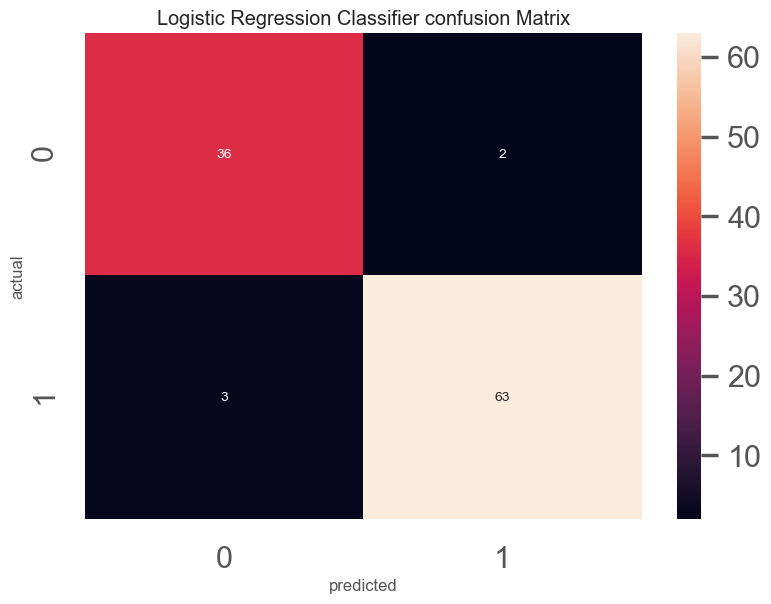

In [635]:
#confusion matirix
lr_matrix = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(lr_matrix,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Logistic Regression Classifier confusion Matrix')


0.9788676236044657

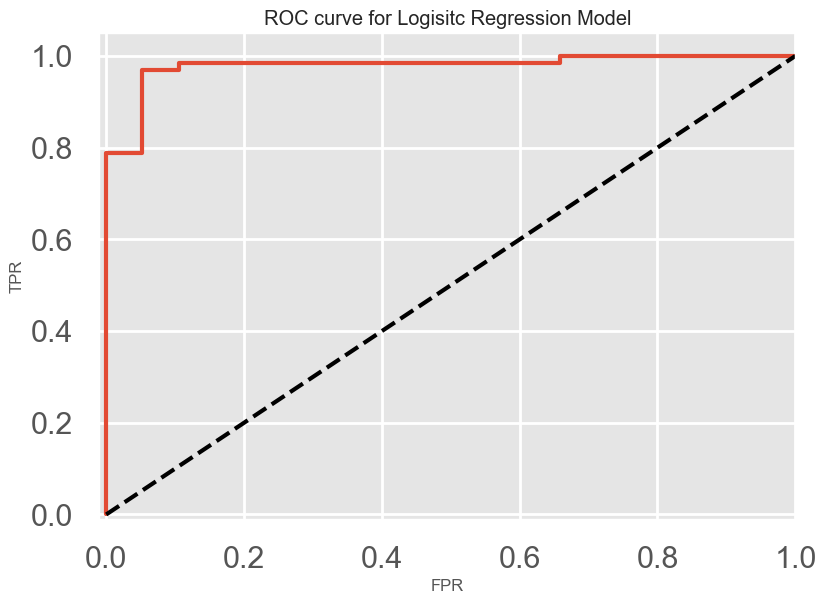

In [669]:
#Roc curve
y_pred_proba_lr = best_model_lr.predict_proba(X_test)[:,1]

fp,tp,threshold = roc_curve(y_test,y_pred_proba_lr)
plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for Logisitc Regression Model')

roc_auc_score(y_test,y_pred_proba_lr)

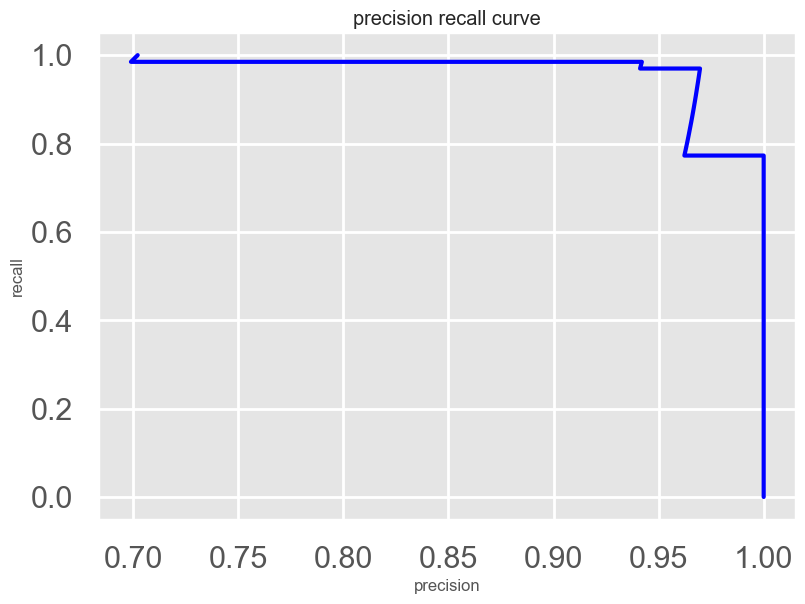

In [609]:
#precision recall curve
precision_lr,recall_lr,_ = precision_recall_curve(y_test,y_pred_proba_m)
plt.plot(precision_lr,recall_lr,c='blue')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision recall curve');

In [670]:
#roc_auc_score
roc_auc_score(y_test,y_pred_proba_lr), auc(recall_lr,precision_lr)

(0.9788676236044657, 0.9879297483732727)

There is an improvement in the f1 score from 95% to 96% for True positives and auc score went up from 94% to 97%


### 7. KNeighbors Classifier

In [610]:
from sklearn.neighbors import KNeighborsClassifier  

In [611]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [612]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.97      0.91      0.94        66

    accuracy                           0.92       104
   macro avg       0.91      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



### Gridsearch KNeighbors Classifier

In [613]:
params_knn = {'n_neighbors':[1,3,5,11,15,19,20],
             'weights':['uniform','distance'],
             'metric':['eucledian','manhattan']}
grid_knn = GridSearchCV(model_knn,param_grid = params_knn,scoring='f1',cv=5,verbose=1,n_jobs=-1)
best_model_knn = grid_knn.fit(X_train,y_train)
y_pred_knn= best_model_knn.predict(X_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/Rime/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.96408443 0.96408443 0.94732016 0.95989293
 0.92503308 0.94720255 0.91536555 0.9491375  0.91039757 0.94253263
 0.90105033 0.94902073 0.89638658 0.94691807]
  category=UserWarning


In [614]:
best_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [615]:
best_model_knn.best_score_


0.9640844317155872

In [616]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.95      0.98        66

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



Text(0.5, 1.0, 'KNeighbor Classifier confusion Matrix')

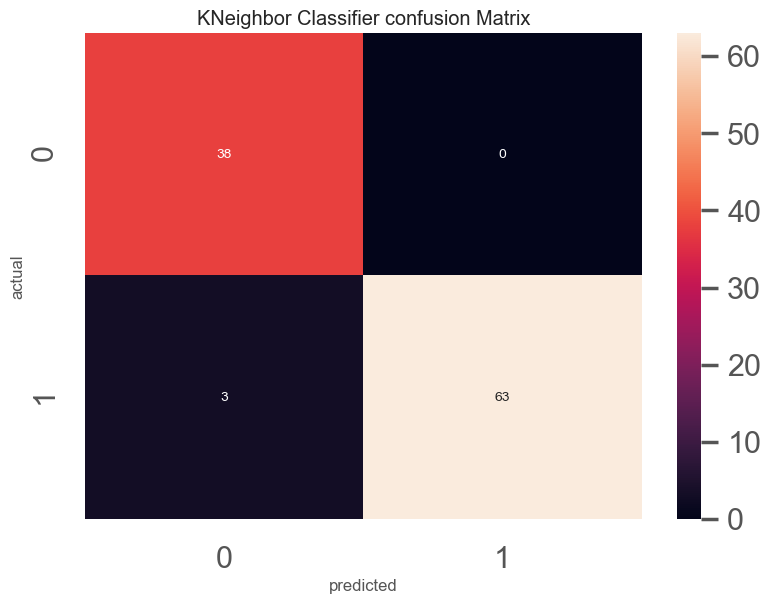

In [617]:
#confusion matirix
knn_matrix = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(knn_matrix,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('KNeighbor Classifier confusion Matrix')

0.9788676236044657

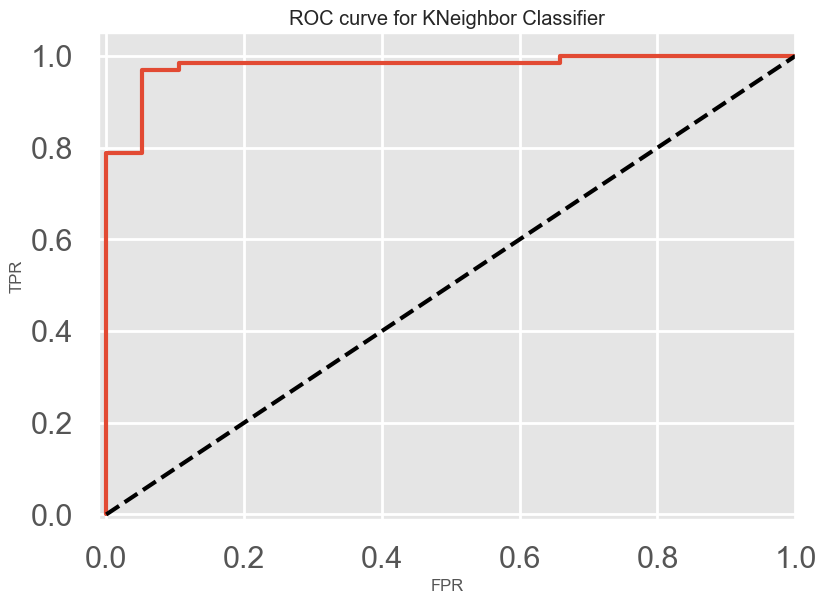

In [666]:
#Roc curve
y_pred_proba_knn = best_model_lr.predict_proba(X_test)[:,1]

fp_knn,tp_knn,threshold = roc_curve(y_test,y_pred_proba_knn)
plt.plot(fp_knn,tp_knn)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for KNeighbor Classifier')

roc_auc_score(y_test,y_pred_proba_knn)

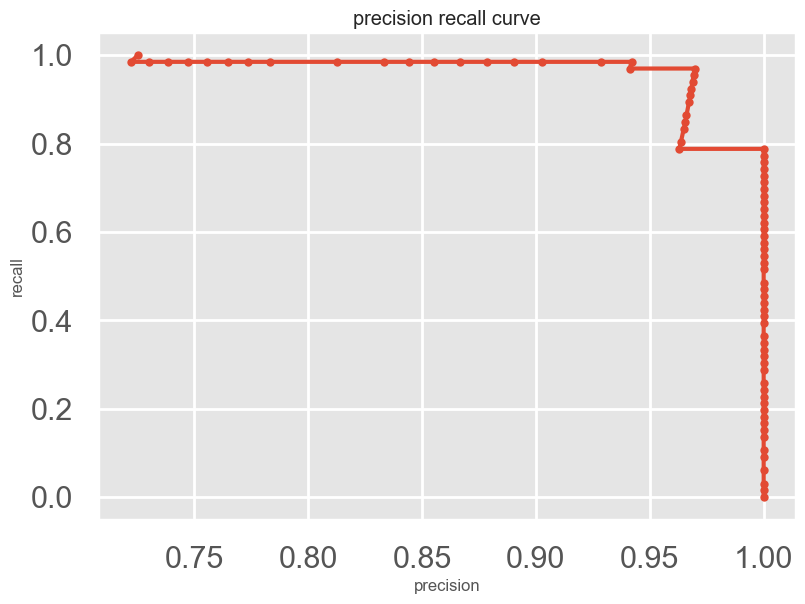

In [665]:
#precision recall curve
precision_knn,recall_knn,_ = precision_recall_curve(y_test,y_pred_proba_knn)
plt.plot(precision_knn,recall_knn,marker='.',label='Knn')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision recall curve');

In [667]:
#auc score
roc_auc_score(y_test,y_pred_proba_knn), auc(recall_knn,precision_knn)

(0.9788676236044657, 0.9888480342952318)

There is no improvement in the number of false negatives but there are no false positives now. Also was a bit if improvement in f1 score.


### 8. Decision Tree

In [620]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [621]:
#fit model with default parameters
dt = DecisionTreeClassifier()

dt.fit(X_train_ss,y_train)
y_pred_dt = dt.predict(X_test)

In [622]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.95      0.92      0.94        66

    accuracy                           0.92       104
   macro avg       0.91      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



In [623]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Grid search for Decision Tree

In [624]:
params= {'criterion':['gini','entropy'],
        'min_samples_split':[2,10,20],
        'max_depth':[None,2,5,10],
        'min_samples_leaf':[1,5,10],
        'max_leaf_nodes':[None,5,10,20]}
dt = DecisionTreeClassifier()
random_dt = GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,scoring='f1')#param_distributions,,random_state=1
best_model_dt = random_dt.fit(X_train,y_train)

In [625]:
best_model_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [626]:
y_pred_dt = best_model_dt.predict(X_test)



In [627]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



Text(0.5, 1.0, 'Decision Tree confusion Matrix')

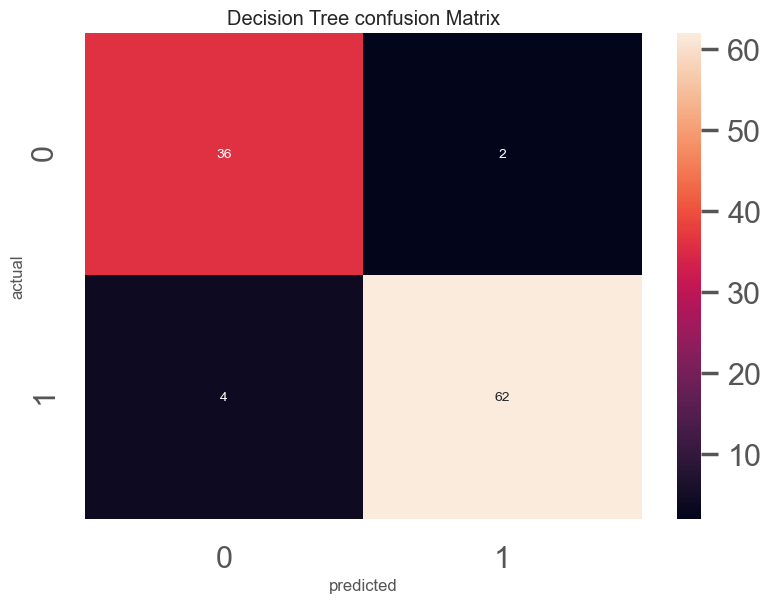

In [636]:
matrix_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(matrix_dt,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Decision Tree confusion Matrix')

0.9262360446570972

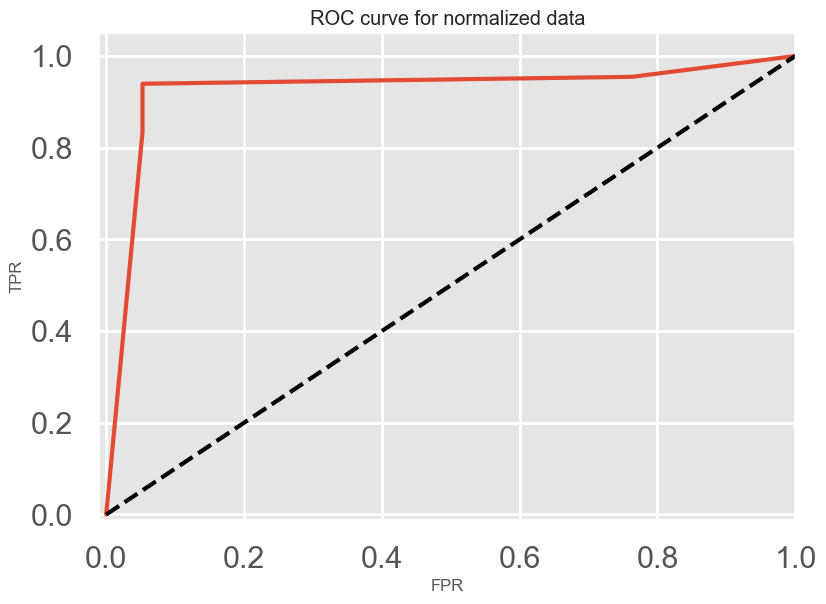

In [629]:
#Roc curve
y_pred_proba_dt = best_model_dt.predict_proba(X_test)[:,1]

fp_dt,tp_dt,threshold = roc_curve(y_test,y_pred_proba_dt)
plt.plot(fp_dt,tp_dt)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for normalized data')

roc_auc_score(y_test,y_pred_proba_dt)

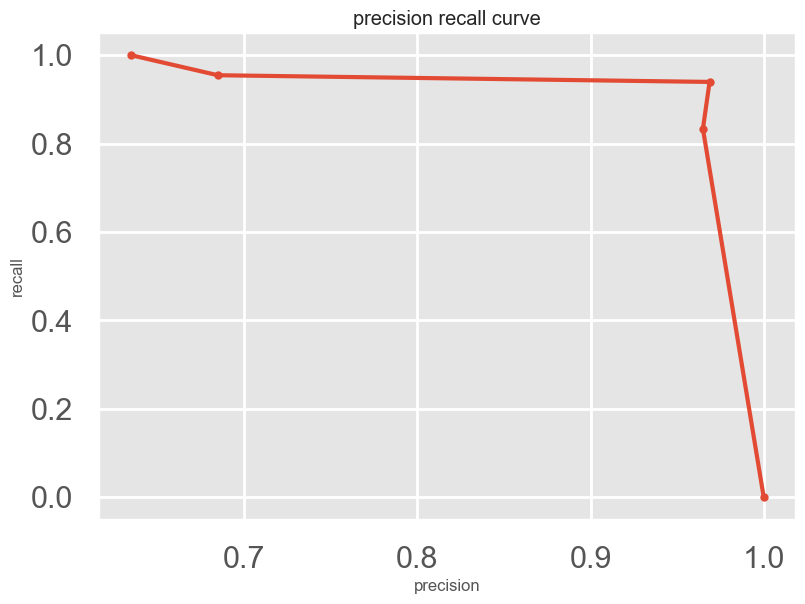

In [523]:
#precision recall curve
precision_dt,recall_dt,_ = precision_recall_curve(y_test,y_pred_proba_dt)
plt.plot(precision_dt,recall_dt,marker='.')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision recall curve');

In [673]:
#auc score
roc_auc_score(y_test,y_pred_proba_dt), auc(recall_dt,precision_dt)

(0.9262360446570972, 0.963769227213163)

Decision tree model gave me lower precision and recall from the kneighbor classifier

### 9. Random forest classifier

For Random Forest model, I will try running the model with Age as a continuous variable and as a categorical variable

In [630]:
#fit random forest with default parameters
model_rf = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf_1 = model_rf.predict(X_test)

confusion_matrix(y_test,y_pred_rf_1)

array([[38,  0],
       [ 0, 66]])

In [631]:
params_rf = {'bootstrap':[True],
          'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
          'max_features':['sqrt','auto','log2'],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,2,4],
          'n_estimators':[200, 400,600, 800, 1000,1200,1400, 1600, 1800, 2000]}
rf = RandomForestClassifier()
model_rf = RandomizedSearchCV(estimator=rf,param_distributions=params_rf,n_iter=100,cv=5,random_state=1,n_jobs=-1)
best_model_rf = model_rf.fit(X_train,y_train)

In [632]:
y_pred_rf = best_model_rf.predict(X_test)

we care about false positives, here we have 0 fn but 0 false positive

In [633]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Text(0.5, 1.0, 'Random Forest confusion Matrix')

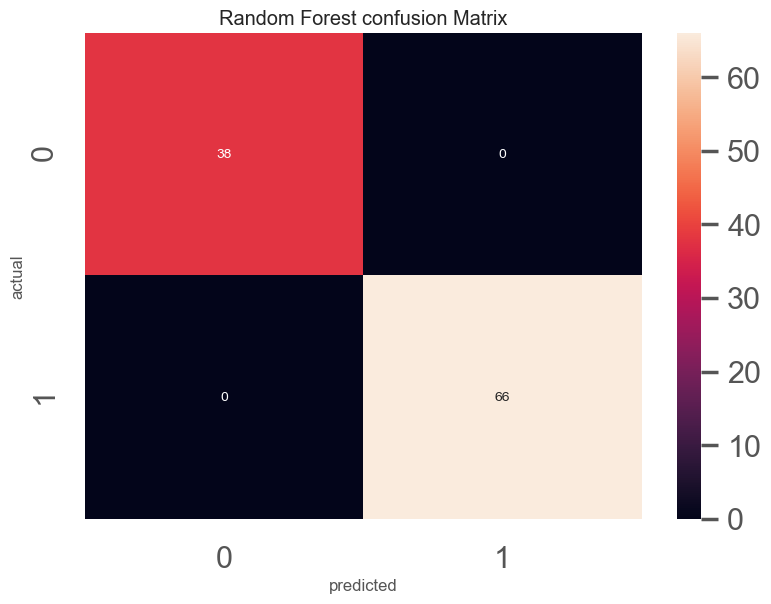

In [637]:
matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(matrix_rf,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest confusion Matrix')

1.0

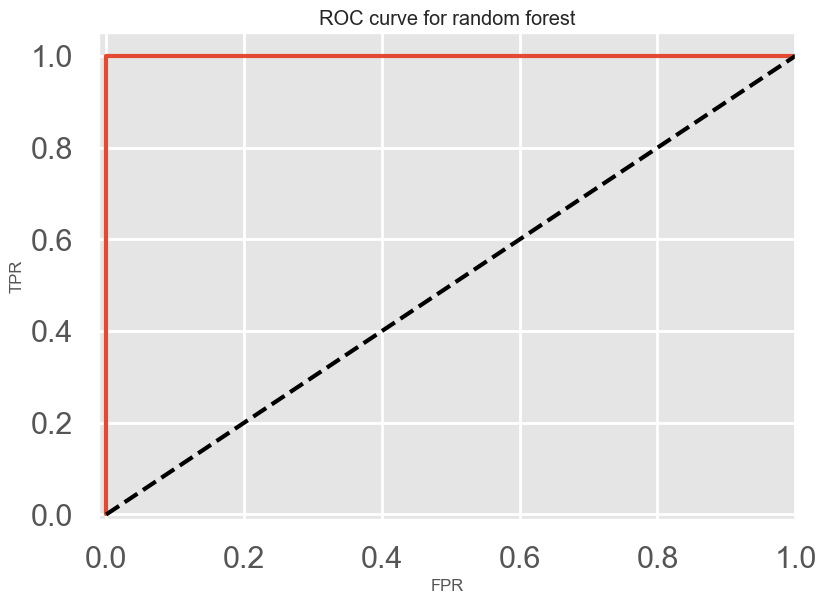

In [542]:
#roc curve
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:,1]

fp_rf,tp_rf,threshold = roc_curve(y_test,y_pred_proba_rf)
plt.plot(fp_rf,tp_rf)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for random forest')

roc_auc_score(y_test,y_pred_proba_rf)

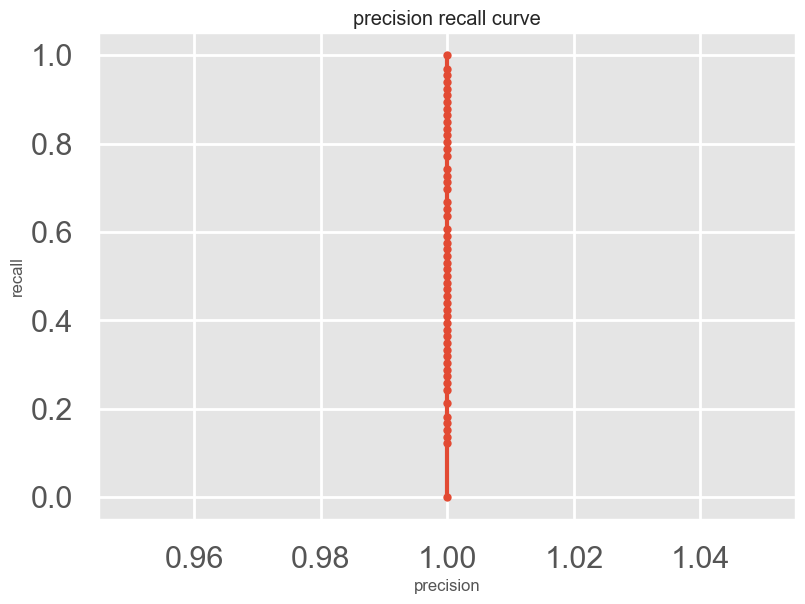

In [548]:
#precision recall curve
precision_rf,recall_rf,_ = precision_recall_curve(y_test,y_pred_proba_rf)
plt.plot(precision_rf,recall_rf,marker='.')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision recall curve');

In [675]:
#auc score
roc_auc_score(y_test,y_pred_proba_rf), auc(recall_rf,precision_rf)

(1.0, 0.9999999999999999)

This is the best model so far, it gave me 100% in all metrics. There are 0 fp and 0 fn

## 10. Run RandomForestClassifier again with age as a categorical variable

In [537]:
#copy numeric_X
X_new = numeric_X.copy()
X_new= X_new.iloc[:,1:]
X_new.head()

Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
0            1             0               1                       0   
1            1             0               0                       0   
2            1             1               0                       0   
3            1             0               0                       1   
4            1             1               1                       1   

   weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0             1               0                   0                    0   
1             1               0                   0                    1   
2             1               1                   0                    0   
3             1               1                   1                    0   
4             1               1                   0                    1   

   Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
0            1                 0                    1                    0   
1            0                 0                    0                    1   
2            1                 0                    1                    0   
3            1                 0                    1                    0   
4            1                 1                    1                    1   

   muscle stiffness_Yes  Alopecia_Yes  Obesity_Yes  
0                     1             1            1  
1                     0             1            0  
2                     1             1            0  
3                     0             0            0  
4                     1             1            1

In [538]:
age_cat = pd.cut(numeric_X['Age'],6)
age_cat_num = pd.get_dummies(age_cat)
age_cat_num


(15.926, 28.333]  (28.333, 40.667]  (40.667, 53.0]  (53.0, 65.333]  \
0                   0                 1               0               0   
1                   0                 0               0               1   
2                   0                 0               1               0   
3                   0                 0               1               0   
4                   0                 0               0               1   
..                ...               ...             ...             ...   
515                 0                 1               0               0   
516                 0                 0               1               0   
517                 0                 0               0               1   
518                 0                 1               0               0   
519                 0                 0               1               0   

     (65.333, 77.667]  (77.667, 90.0]  
0                   0               0  
1                   0               0  
2                   0               0  
3                   0               0  
4                   0               0  
..                ...             ...  
515                 0               0  
516                 0               0  
517                 0               0  
518                 0               0  
519                 0               0  

[520 rows x 6 columns]

In [539]:
X_cat_age = pd.concat([age_cat_num,X_new],axis=1)


In [540]:
X_cat_age.head()

(15.926, 28.333]  (28.333, 40.667]  (40.667, 53.0]  (53.0, 65.333]  \
0                 0                 1               0               0   
1                 0                 0               0               1   
2                 0                 0               1               0   
3                 0                 0               1               0   
4                 0                 0               0               1   

   (65.333, 77.667]  (77.667, 90.0]  Gender_Male  Polyuria_Yes  \
0                 0               0            1             0   
1                 0               0            1             0   
2                 0               0            1             1   
3                 0               0            1             0   
4                 0               0            1             1   

   Polydipsia_Yes  sudden weight loss_Yes  ...  Polyphagia_Yes  \
0               1                       0  ...               0   
1               0                       0  ...               0   
2               0                       0  ...               1   
3               0                       1  ...               1   
4               1                       1  ...               1   

   Genital thrush_Yes  visual blurring_Yes  Itching_Yes  Irritability_Yes  \
0                   0                    0            1                 0   
1                   0                    1            0                 0   
2                   0                    0            1                 0   
3                   1                    0            1                 0   
4                   0                    1            1                 1   

   delayed healing_Yes  partial paresis_Yes  muscle stiffness_Yes  \
0                    1                    0                     1   
1                    0                    1                     0   
2                    1                    0                     1   
3                    1                    0                     0   
4                    1                    1                     1   

   Alopecia_Yes  Obesity_Yes  
0             1            1  
1             1            0  
2             1            0  
3             0            0  
4             1            1  

[5 rows x 21 columns]

In [549]:
#X_train, X_test
X_train_cat, X_test_cat,y_train,y_test=train_test_split(X_cat_age,y,test_size=0.2,random_state=123)
X_train_cat.shape,X_test_cat.shape

((416, 21), (104, 21))

In [550]:
#run random search for random forest on this new dataset with same params
rf = RandomForestClassifier()
model_rf_cat = RandomizedSearchCV(estimator = rf,param_distributions=params_rf,cv=5,n_iter=100,random_state=1,n_jobs=-1)
model_cat = model_rf_cat.fit(X_train_cat,y_train)

In [551]:
y_pred_cat = model_cat.predict(X_test_cat)

In [561]:
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Text(0.5, 1.0, 'Random Forest')

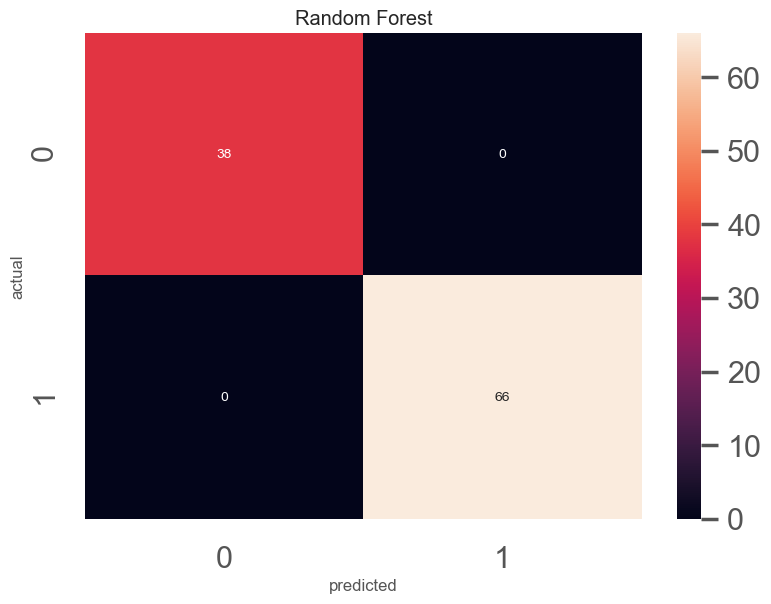

In [553]:
matrix_rf = confusion_matrix(y_test,y_pred_cat)
sns.heatmap(matrix_rf,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest')

Same results for categorical age

### compare ROC curves for all models

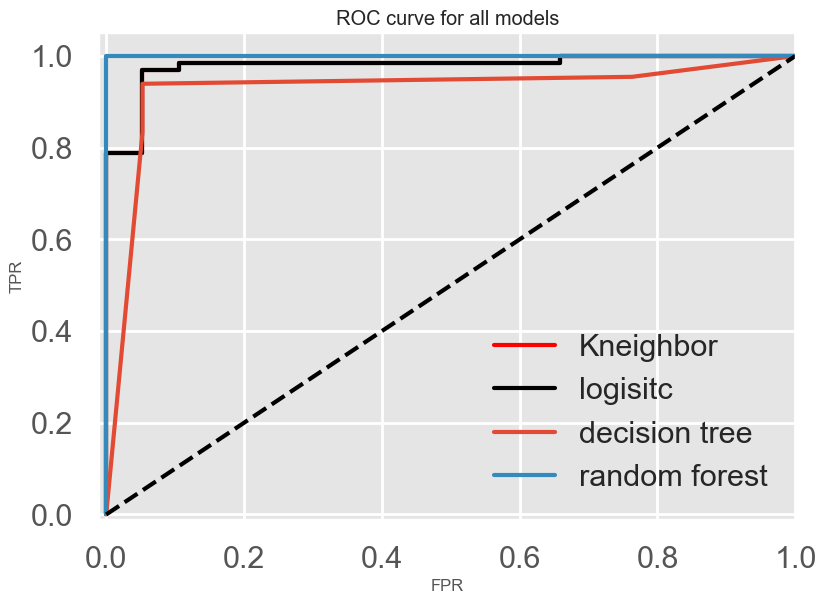

In [638]:
#Roc curve
y_pred_proba_lr = best_model_lr.predict_proba(X_test)[:,1]

fp_lr,tp_lr,threshold = roc_curve(y_test,y_pred_proba_lr)

plt.plot(fp_knn,tp_knn,label='Kneighbor',c='red')
plt.plot(fp_lr,tp_lr,c='black',label='logisitc')
plt.plot(fp_dt,tp_dt,label='decision tree')
plt.plot(fp_rf,tp_rf,label='random forest')

plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for all models')
plt.legend();

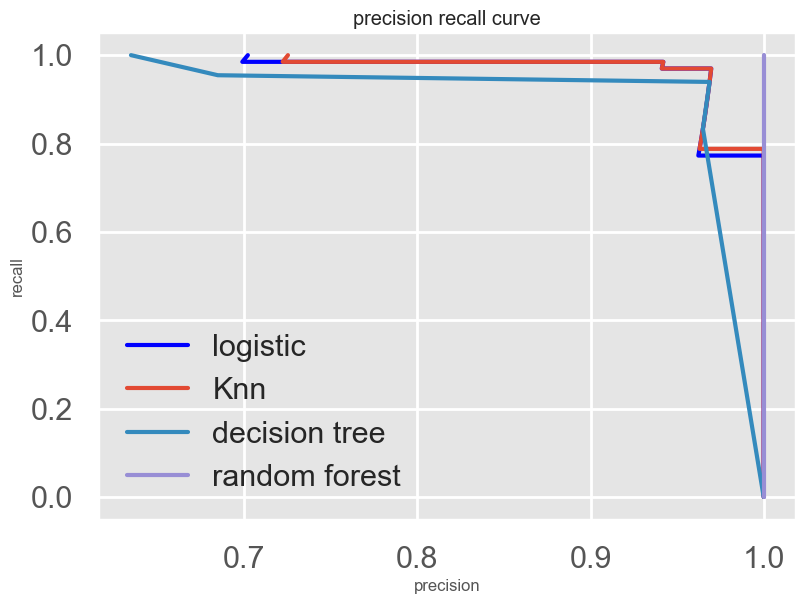

In [643]:
plt.plot(precision_lr,recall_lr,c='blue',label='logistic')
plt.plot(precision_knn,recall_knn,label='Knn')
plt.plot(precision_dt,recall_dt,label='decision tree')
plt.plot(precision_rf,recall_rf,label='random forest')

plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision recall curve')
plt.legend();

The best model that gives me the best results is the Random Forest. It gave me the highest f1 score and the lowest number of false negatives

## 11. Pipeline

In [695]:
from sklearn.pipeline import Pipeline
params_rf = {'model__bootstrap':[True],
          'model__max_depth':[10,20,30,40,50,60,70,80,90,100,None],
          'model__max_features':['sqrt','auto','log2'],
          'model__min_samples_split':[2,5,10],
          'model__min_samples_leaf':[1,2,4],
          'model__n_estimators':[200, 400,600, 800, 1000,1200,1400, 1600, 1800, 2000]}
pipeline = Pipeline([('standard', StandardScaler()), ('model',RandomForestClassifier())])
grid =RandomizedSearchCV(estimator=pipeline,param_distributions=params_rf,n_iter=100,cv=5,random_state=1,scoring='roc_auc')


In [696]:
grid.fit(X_train,y_train)
#pipeline.score(X_test,y_test)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standard', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'model__bootstrap': [True],
                                        'model__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, None],
                                        'model__max_features': ['sqrt', 'auto',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 400, 600,
                                                

In [698]:
y_pred_pipe = grid.predict(X_test)
print(classification_report(y_test,y_pred_pipe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Notes:
- The first model I ran was Logistic regression 
- I tested if there is a difference between standardizing or normalizing the age variable and found that normalizing gives slightly better results in logistic regression so I used normalized data for all the other models.
- I ran PCA to see if some features can be excluded but found that there was no clear elbow so I used all the variables in the models
- I ran was Logistic regression using Gridsearch to find the optimal hyper parameters. This model gave me an f1 score of 96% and a recall of 95% and precision of 97%. The model made 5 mistakes 2 false positives and 3 false negatives.
- Next I ran a kneighbors classifier which scored 100% for precision for positives and 95% for recall.It model made only three mistakes and they were all false negatives
- Next is decision tree with GridSearch and it scored 97% for precision and 94% for recall and it made 6 mistakes, a much worse result than Kneighbor classifier
- Next is decision tree with GridSearch and it scored 97% for precision and 94% for recall and it made 6 mistakes
- Next is RandomForestClassifer using RandomSearchCV to serch for the optimal parameter, and this classifier gave me a 100% recall and 100% precision. Obviously this is the best model to use
-  I also tried the same model but using Age variable as a categorical variable instead of continuous and it gave the same results.


